# Course: INF 2178 - Experimental Design For Data Science
# Name: Saad Umar
# Instructor: Shion Guha
# Program: Master of Information
# University of Toronto

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns

In [3]:
# Read in the xlsx file
df = pd.read_excel("INF2178_A1_data.xlsx")

# First 5 records
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


### Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [6]:
# Distinct values
df.nunique()

OCCUPANCY_DATE            365
ORGANIZATION_NAME          35
PROGRAM_ID                169
PROGRAM_NAME              167
SECTOR                      5
PROGRAM_MODEL               2
OVERNIGHT_SERVICE_TYPE      7
PROGRAM_AREA                4
SERVICE_USER_COUNT        331
CAPACITY_TYPE               2
CAPACITY_ACTUAL_BED       173
OCCUPIED_BEDS             191
CAPACITY_ACTUAL_ROOM      221
OCCUPIED_ROOMS            248
dtype: int64

In [7]:
# Calculate occupancy rates where data is available
# For beds
df['BED_OCCUPANCY_RATE'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']

# For rooms
df['ROOM_OCCUPANCY_RATE'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']

# Drop the rows where both occupancy rates are NaN as they can't be used in t-tests
df = df.dropna(subset=['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE'], how='all')

# Now let's look at the cleaned data and the new occupancy rate columns
df[['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE']].describe()
#df = df.drop(df.columns[:9], axis = 1)
df

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,BED_OCCUPANCY_RATE,ROOM_OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,NaN,0.896552
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,NaN,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,NaN,0.821429
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,NaN,1.000000
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,NaN,0.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,YWCA Toronto,14671,YWCA Davenport - Youth,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN,0.300000,NaN
50940,2021-12-31,Youth Without Shelter,12292,Youth without Shelter Emergency Shelter Program,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN,1.000000,NaN
50941,2021-12-31,Youth Without Shelter,12291,Youth without Shelter Stay In School Program,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN,0.928571,NaN
50942,2021-12-31,YouthLink,14891,YouthLink Emergency Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN,1.000000,NaN


### Descriptive Statistics

In [9]:
def get_summary_statistics(df, column_name):
    
    # Convert the column to numeric (assuming it contains numeric values)
    df_bed[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    
    mean = np.round(np.mean(df[column_name]), 2)
    median = np.round(np.median(df[column_name]), 2)
    min_value = np.round(df[column_name].min(), 2)
    max_value = np.round(df[column_name].max(), 2)
    quartile_1 = np.round(df[column_name].quantile(0.25), 2)
    quartile_3 = np.round(df[column_name].quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [10]:
df_bed = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']
df_bed = df_bed.drop(['OVERNIGHT_SERVICE_TYPE', 'PROGRAM_NAME', 'PROGRAM_AREA', 'PROGRAM_ID','OCCUPANCY_DATE', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS', 'ROOM_OCCUPANCY_RATE'], axis=1)
df_bed.head()

,ORGANIZATION_NAME,SECTOR,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,BED_OCCUPANCY_RATE
5,COSTI Immigrant Services,Mixed Adult,Emergency,6,Bed Based Capacity,8.0,6.0,0.750000
10,Christie Ossington Neighbourhood Centre,Men,Emergency,22,Bed Based Capacity,24.0,22.0,0.916667
11,Christie Ossington Neighbourhood Centre,Men,Emergency,8,Bed Based Capacity,12.0,8.0,0.666667
21,City of Toronto,Men,Transitional,10,Bed Based Capacity,12.0,10.0,0.833333
25,City of Toronto,Families,Emergency,11,Bed Based Capacity,12.0,11.0,0.916667


In [11]:
print('\n\033[1mActual Bed Capacity summary statistics\033[0m')
get_summary_statistics(df_bed, 'CAPACITY_ACTUAL_BED')

print('\n\n\033[1mOccupied Beds summary statistics\033[0m')
get_summary_statistics(df_bed, 'OCCUPIED_BEDS')

print('\n\n\033[1mBed occupancy rate - summary statistics\033[0m')
get_summary_statistics(df_bed, 'BED_OCCUPANCY_RATE')


Actual Bed Capacity summary statistics
Min: 1.0
Mean: 31.63
Max: 234.0
25th percentile: 15.0
Median: 25.0
75th percentile: 43.0
Interquartile range (IQR): 28.0


Occupied Beds summary statistics
Min: 1.0
Mean: 29.78
Max: 234.0
25th percentile: 14.0
Median: 23.0
75th percentile: 41.0
Interquartile range (IQR): 27.0


Bed occupancy rate - summary statistics
Min: 0.02
Mean: 0.93
Max: 1.0
25th percentile: 0.9
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.1


In [12]:
df_room = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']
df_room = df_room.drop(['OVERNIGHT_SERVICE_TYPE', 'PROGRAM_NAME', 'OCCUPANCY_DATE', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'BED_OCCUPANCY_RATE'], axis=1)
df_room.head()

,ORGANIZATION_NAME,PROGRAM_ID,SECTOR,PROGRAM_MODEL,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,ROOM_OCCUPANCY_RATE
0,COSTI Immigrant Services,15371,Families,Emergency,COVID-19 Response,74,Room Based Capacity,29.0,26.0,0.896552
1,COSTI Immigrant Services,16211,Mixed Adult,Emergency,COVID-19 Response,3,Room Based Capacity,3.0,3.0,1.000000
2,COSTI Immigrant Services,16192,Men,Emergency,COVID-19 Response,24,Room Based Capacity,28.0,23.0,0.821429
3,COSTI Immigrant Services,16191,Mixed Adult,Emergency,COVID-19 Response,25,Room Based Capacity,17.0,17.0,1.000000
4,COSTI Immigrant Services,16193,Women,Emergency,COVID-19 Response,13,Room Based Capacity,14.0,13.0,0.928571


In [13]:
print('\n\033[1mActual Room Capacity summary statistics\033[0m')
get_summary_statistics(df_room, 'CAPACITY_ACTUAL_ROOM')

print('\n\n\033[1mOccupied Rooms summary statistics\033[0m')
get_summary_statistics(df_room, 'OCCUPIED_ROOMS')

print('\n\n\033[1mRoom Occupancy rate - summary statistics\033[0m')
get_summary_statistics(df_room, 'ROOM_OCCUPANCY_RATE')


Actual Room Capacity summary statistics
Min: 1.0
Mean: 55.55
Max: 268.0
25th percentile: 19.0
Median: 35.0
75th percentile: 68.0
Interquartile range (IQR): 49.0


Occupied Rooms summary statistics
Min: 1.0
Mean: 52.8
Max: 268.0
25th percentile: 16.0
Median: 34.0
75th percentile: 66.0
Interquartile range (IQR): 50.0


Room Occupancy rate - summary statistics
Min: 0.01
Mean: 0.93
Max: 1.01
25th percentile: 0.96
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.04


In [14]:
filtered_df = df[(df['SECTOR'] == 'Men') & (df['CAPACITY_TYPE'] == 'Room Based Capacity')]
filtered_df = filtered_df.drop(['OVERNIGHT_SERVICE_TYPE', 'PROGRAM_ID', 'SERVICE_USER_COUNT','OCCUPIED_ROOMS', 'CAPACITY_ACTUAL_ROOM','PROGRAM_NAME', 'OCCUPANCY_DATE', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'BED_OCCUPANCY_RATE'], axis=1)

print('\n\n\033[1mRoom Occupancy rate - summary statistics For MEN\033[0m')
get_summary_statistics(filtered_df, 'ROOM_OCCUPANCY_RATE')



Room Occupancy rate - summary statistics For MEN
Min: 0.82
Mean: 1.0
Max: 1.0
25th percentile: 1.0
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.0


In [15]:
filtered_df1 = df[(df['SECTOR'] == 'Women') & (df['CAPACITY_TYPE'] == 'Room Based Capacity')]
filtered_df1 = filtered_df1.drop(['OVERNIGHT_SERVICE_TYPE', 'PROGRAM_ID', 'SERVICE_USER_COUNT','OCCUPIED_ROOMS', 'CAPACITY_ACTUAL_ROOM','PROGRAM_NAME', 'OCCUPANCY_DATE', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'BED_OCCUPANCY_RATE'], axis=1)

print('\n\n\033[1mRoom Occupancy rate - summary statistics For Women\033[0m')
get_summary_statistics(filtered_df1, 'ROOM_OCCUPANCY_RATE')



Room Occupancy rate - summary statistics For Women
Min: 0.38
Mean: 0.97
Max: 1.0
25th percentile: 0.99
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.01


### EDA

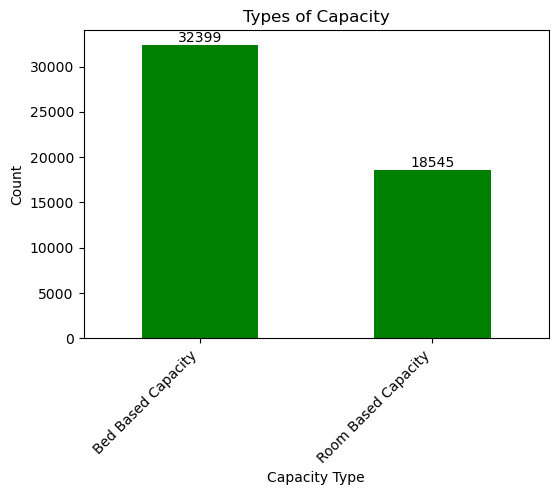

In [17]:
plt.figure(figsize = (6,4))
capacityType = df['CAPACITY_TYPE'].value_counts().nlargest(10)
capacityType.plot(kind='bar', color='green')
plt.title('Types of Capacity')
plt.xlabel('Capacity Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(capacityType):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
    
plt.show()

The above figure shows that the City of Toronto provides shelter either in the capacity of rooms or beds. The most common capacity type appears to be 'Bed Based Capacity' dominating across the various sectors. 

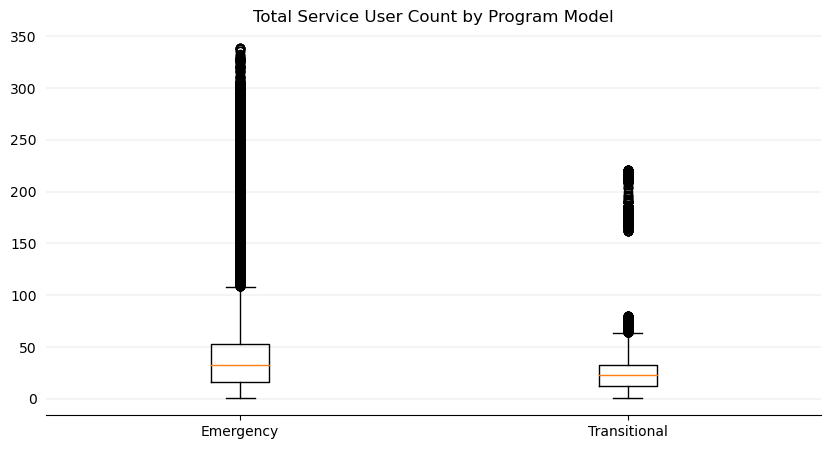

In [19]:
# Extract relevant columns from each dataframe
service_count_model_emergency = df[df['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
service_count_model_transitional = df[df['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']

# Merge them in one dataset
df_merge1 = [service_count_model_emergency.dropna(), service_count_model_transitional.dropna() ]

# Boxplot for different program models
fig, ax = plt.subplots(figsize=(10, 5))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis = 'y', linestyle = '-', linewidth = 0.25, alpha = 0.5)

# Set plot title
ax.set_title('Total Service User Count by Program Model')

labels = ['Emergency', 'Transitional']
ax.boxplot(data = df, labels = labels, x = df_merge1)
plt.show()

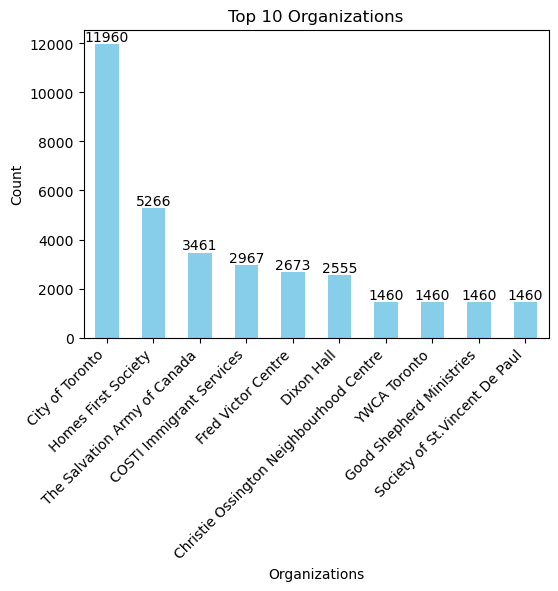

In [20]:
# Visualizing the top 10 organizations providing the most shelters
plt.figure(figsize = (6,4))
top_10_organizations = df['ORGANIZATION_NAME'].value_counts().nlargest(10)
top_10_organizations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Organizations')
plt.xlabel('Organizations')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_10_organizations):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
    
plt.show()

The above figure shows the different types of organizations that are providing shelters. It is evident that the City of Toronto as an organization is providing for the most shelters, followed by Homes First Society and The Salvation Army of Canada.

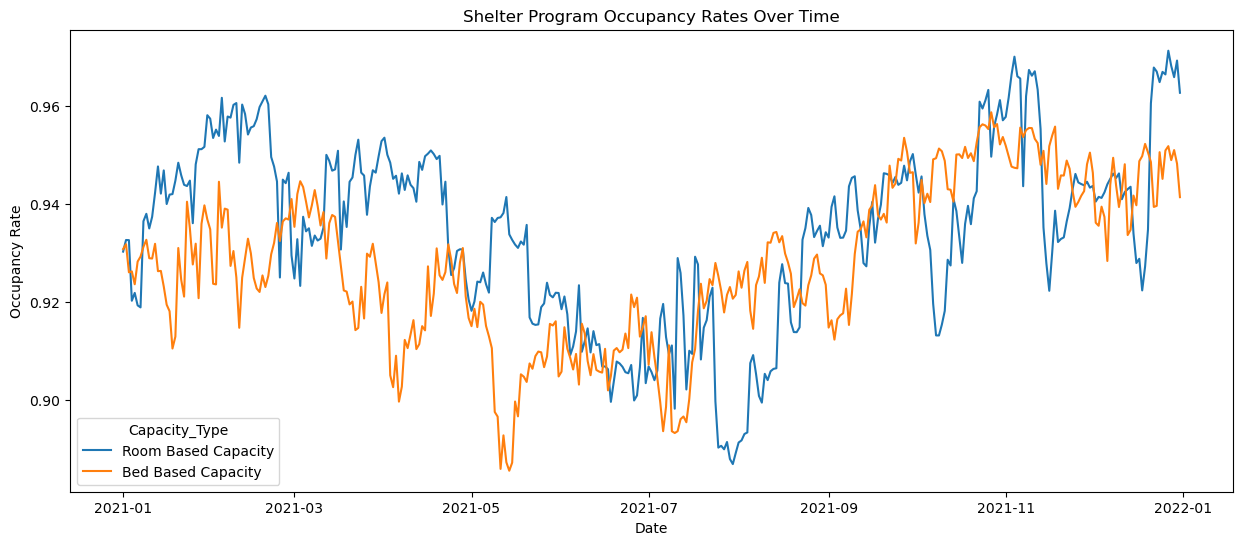

In [22]:
plt.figure(figsize=(15,6))
sns.lineplot(x="OCCUPANCY_DATE", y="ROOM_OCCUPANCY_RATE", hue= "CAPACITY_TYPE", data=df, errorbar=None)
sns.lineplot(x="OCCUPANCY_DATE", y="BED_OCCUPANCY_RATE", hue= "CAPACITY_TYPE", legend=False, data=df, errorbar=None)
plt.title("Shelter Program Occupancy Rates Over Time")
plt.xlabel("Date")
plt.ylabel("Occupancy Rate")
plt.legend(title = "Capacity_Type")
plt.show()

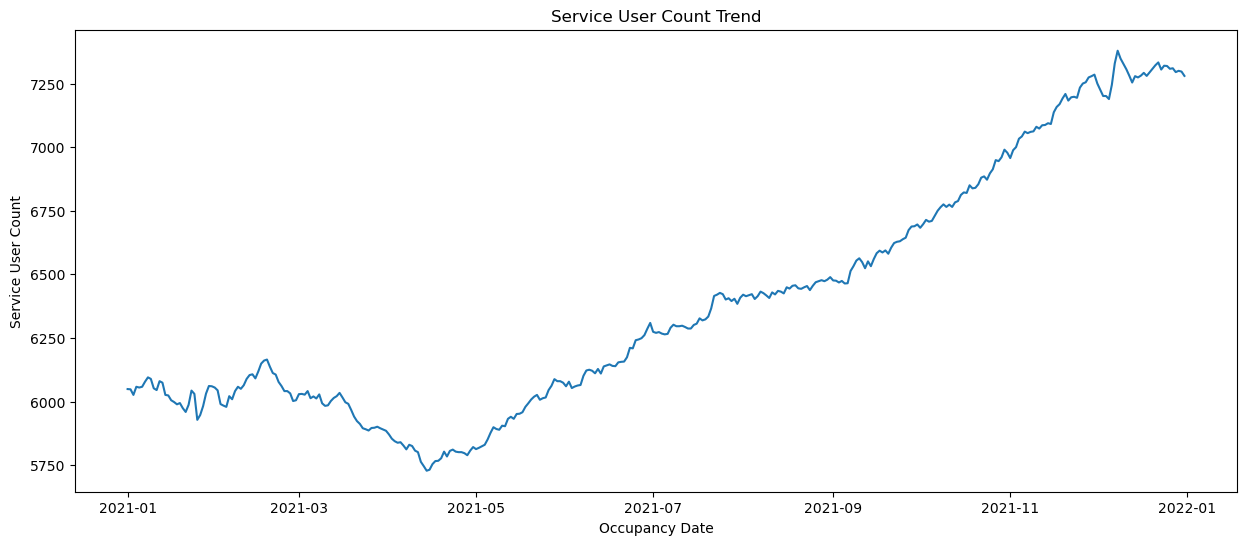

In [23]:
# Ensure its in the appropriate format
df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])

# Group 'SERVICE_USER_COUNT' with 'OCCUPANCY_DATE'
user_count_trend = df.groupby('OCCUPANCY_DATE')['SERVICE_USER_COUNT'].sum().reset_index()

# Create a time series plot
plt.figure(figsize=(15, 6))
sns.lineplot(data = user_count_trend, x='OCCUPANCY_DATE', y='SERVICE_USER_COUNT')
plt.title('Service User Count Trend')
plt.xlabel('Occupancy Date')
plt.ylabel('Service User Count')
plt.show()

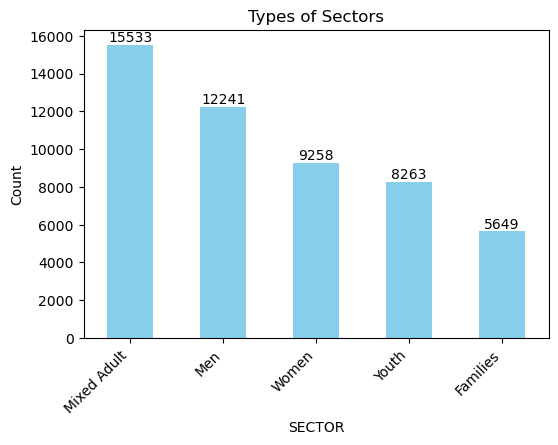

In [24]:
# Visualizing the differenet 'Seectors' and their count
plt.figure(figsize = (6,4))
capacityType = df['SECTOR'].value_counts().nlargest(10)
capacityType.plot(kind='bar', color='skyblue')
plt.title('Types of Sectors')
plt.xlabel('SECTOR')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(capacityType):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
    
plt.show()

The above figure shows the different types of sectors that are being catered to (Mixed Adult, Men, Women, Youth, Families). It is evident that the City's shelter services are diverse, addressing the needs of various demographic groups. The most prominent sector in terms of sector is Mixed Adult, followed by Men, and Women respectively

In [26]:
# Extract relevant columns from each dataframe
service_count_bed = df_bed['SERVICE_USER_COUNT']
service_count_room = df_room['SERVICE_USER_COUNT']

# Merge them in one dataset
df_merge = [service_count_bed.dropna(), service_count_room.dropna()]

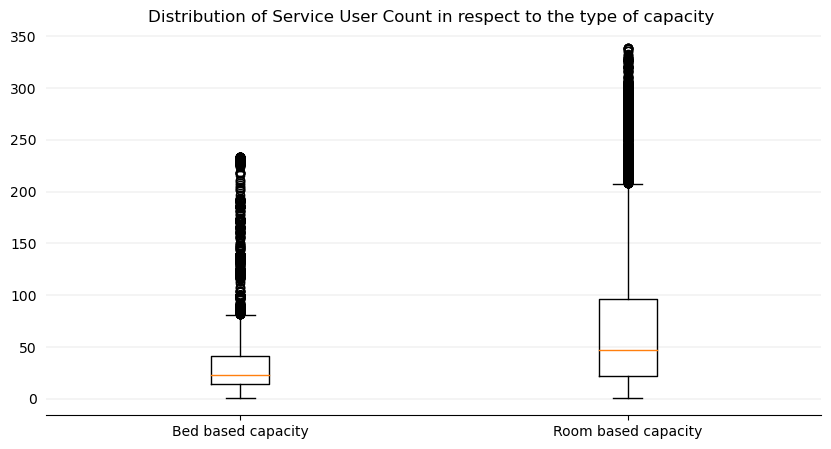

In [27]:
# Visualize Capacity of actual beds and occupied beds
fig, ax = plt.subplots(figsize=(10, 5))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis = 'y', linestyle = '-', linewidth = 0.25, alpha = 0.5)

# Set plot title
ax.set_title('Distribution of Service User Count in respect to the type of capacity ')

labels = ['Bed based capacity', 'Room based capacity']
ax.boxplot(data = df_merge, labels = labels, x = df_merge)
plt.show()

The boxplot depicts the distribution of service user counts for both bed-based and room-based capacities. For bed-based capacity, the median service user count is around 20. The lower whisker extends from 0, and the upper whisker reaches approximately 75, with several outliers indicating variability beyond the typical range. On the other hand, for room-based capacity, the lower whisker starts at 0, and the upper whisker extends to around 210. The median service user count is approximately 45, suggesting a higher central tendency compared to bed-based capacity. These insights emphasize the significant differences in service user counts and their distribution patterns between the two capacity types

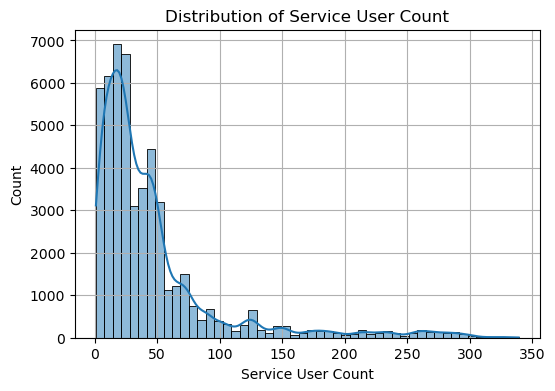

In [29]:
# Distribution of SERVICE_USER_COUNT
plt.figure(figsize=(6, 4))
sns.histplot(df['SERVICE_USER_COUNT'], bins=50, kde=True)
plt.title('Distribution of Service User Count')
plt.xlabel('Service User Count')
plt.ylabel('Count')
plt.grid(True)
plt.show()

The above histogram shows that the service user count is right-skewed. The majority of the data points are concentrated on the left side of the histogram, indicating that most values are on the lower side. The central tendency of the distribution will be ideally be represented by the median due to the influence of the right tail on the mean.

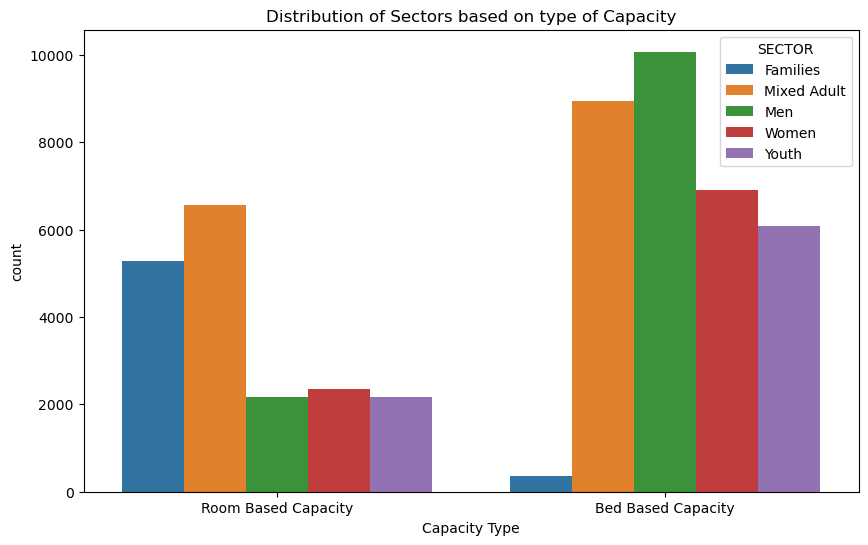

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CAPACITY_TYPE', hue='SECTOR', data=df)
plt.title('Distribution of Sectors based on type of Capacity')
plt.xlabel('Capacity Type')
plt.show()

The bar graph displays the distribution across different sectors for two types of capacity: room-based and bed-based. On the x-axis, we have the two capacity types - room-based capacity and bed-based capacity. The y-axis represents the count of each capacity type being used. Each bar corresponds to a specific sector, including families, mixed adults, men, women, and youth. The varying heights of the bars provide a visual comparison of counts across the different sectors for both room-based and bed-based capacities, offering insights into the distribution of services among diverse demographic groups

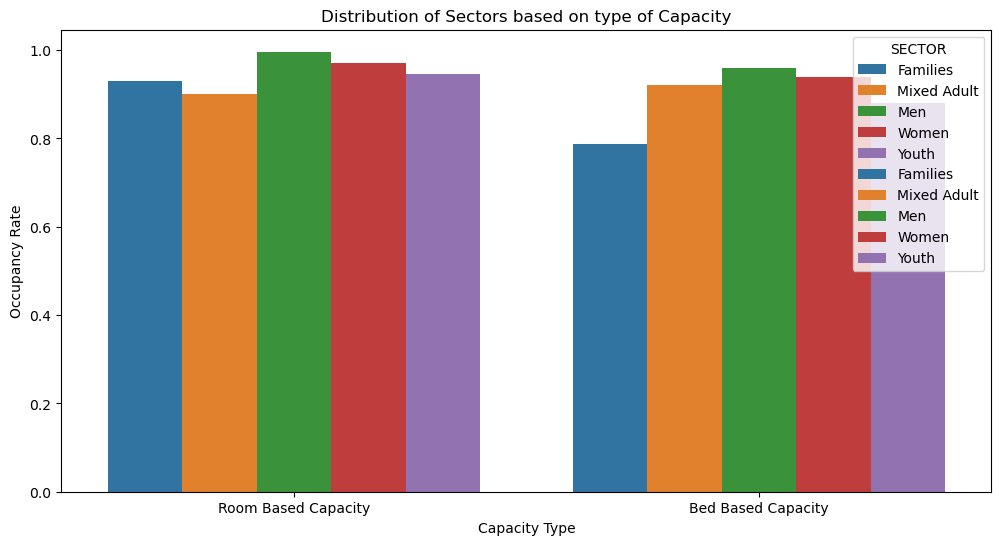

In [33]:
plt.figure(figsize=(12, 6))

# Selecting relevant columns from the DataFrame
df_bar = df[['CAPACITY_TYPE', 'ROOM_OCCUPANCY_RATE', 'BED_OCCUPANCY_RATE', 'SECTOR']]

# Using seaborn barplot with hue
bx = sns.barplot(x='CAPACITY_TYPE', y='ROOM_OCCUPANCY_RATE', hue='SECTOR', data=df_bar,errorbar=None)
ax = sns.barplot(x='CAPACITY_TYPE', y='BED_OCCUPANCY_RATE', hue='SECTOR', data=df_bar, errorbar=None)

plt.title('Distribution of Sectors based on type of Capacity')
plt.xlabel('Capacity Type')
plt.ylabel('Occupancy Rate')
plt.show()


### Statistical Analysis

In [35]:
# --------------------------------------------------------------------------
# Input: Two samples/groups in the form of a Pandas Series
# Output: t_statistic: Welch's t-statistic and p_value

# Description:
#    This function performs Welch's t-test for two independent samples
# --------------------------------------------------------------------------

def welch_t_test(sample1, sample2):
    t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)

    if p_value < 0.05:
        print("The test is statistically significant")
    else:
        print("The test is not statistically significant")
        
    return t_statistic, p_value

#### T-Test 1: compare if there is a significant difference in the type of capacity and its respective occupancy rate

In [37]:
# Separate the data into two groups based on 'capacity_type'
bed_group = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['BED_OCCUPANCY_RATE']
room_group = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['ROOM_OCCUPANCY_RATE']

# Perform Welch's t-test
t_statistic, p_value = welch_t_test(bed_group, room_group)

print("Welch's t-statistic:", t_statistic)
print("P-value:", p_value)

The test is statistically significant
Welch's t-statistic: -4.498751771925636
P-value: 6.860477551487939e-06


#### T-Test 2: compare if there is a significant difference in the Room Occupancy Rate between Men & Women

In [39]:
# Separate the data into two groups based on 'Sectors (Men & Women)'
men_group_room = df[df['SECTOR'] == 'Men']['ROOM_OCCUPANCY_RATE'].dropna()
women_group_room = df[df['SECTOR'] == 'Women']['ROOM_OCCUPANCY_RATE'].dropna()

# Perform Welch's t-test
t_statistic, p_value = welch_t_test(men_group_room, women_group_room)

print("Welch's t-statistic:", t_statistic)
print("P-value:", p_value)

The test is statistically significant
Welch's t-statistic: 13.729207701163253
P-value: 2.3324018592726617e-41


#### T-Test 3: compare if there is a significant difference in the Bed Occupancy Rate between Men & Women

In [41]:
# Separate the data into two groups based on 'Sectors (Men & Women)'
men_group_bed = df[df['SECTOR'] == 'Men']['BED_OCCUPANCY_RATE'].dropna()
women_group_bed = df[df['SECTOR'] == 'Women']['BED_OCCUPANCY_RATE'].dropna()

# Perform Welch's t-test
t_statistic, p_value = welch_t_test(men_group_bed, women_group_bed)

print("Welch's t-statistic:", t_statistic)
print("P-value:", p_value)

The test is statistically significant
Welch's t-statistic: 12.917987255240035
P-value: 6.490999518169515e-38


#### T-Test 4: compare if there is a significant difference in the service user count for the two different types of capacities

In [43]:
# Separate the data into two groups based on 'capacity_type'
bed_group1 = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity']['SERVICE_USER_COUNT']
room_group1 = df[df['CAPACITY_TYPE'] == 'Room Based Capacity']['SERVICE_USER_COUNT']

# Perform Welch's t-test
t_statistic, p_value = welch_t_test(bed_group, room_group)

print("Welch's t-statistic:", t_statistic)
print("P-value:", p_value)

The test is statistically significant
Welch's t-statistic: -4.498751771925636
P-value: 6.860477551487939e-06
